In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt


# Machine learning on car collision data

In [3]:
# Load the data
file_path = Path('collision_data_ml_auto.csv')
ml_df = pd.read_csv(file_path)
ml_df

,collision_time,day_of_week,weather_1,type_of_collision,road_surface,road_cond_1,lighting,point_x,point_y,at_fault,...,vehicle_year,stwd_vehicle_type,race,victim_age,victim_sex,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,1855,2,A,C,A,H,A,-118.094681,33.945511,N,...,2019,A,A,28,F,1,GM,1,0,0
1,1955,7,A,B,A,H,C,-118.280930,34.009389,N,...,2012,A,B,30,M,2,GM,3,0,0
2,1955,7,A,B,A,H,C,-118.280930,34.009389,N,...,2012,A,B,29,M,1,GM,1,0,0
3,1955,7,A,B,A,H,C,-118.280930,34.009389,Y,...,2017,A,B,53,F,2,GL,3,0,0
4,1010,3,A,D,A,H,A,-118.315700,34.083510,N,...,2017,A,H,18,M,2,GL,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92322,1240,7,A,D,A,H,A,-118.281540,33.862709,Y,...,2012,A,H,62,F,2,GM,3,0,0
92323,1240,7,A,D,A,H,A,-118.281540,33.862709,Y,...,2012,A,H,10,F,2,GM,4,0,0
92324,1240,7,A,D,A,H,A,-118.281540,33.862709,Y,...,2012,A,H,56,F,2,GM,6,0,0
92325,1721,3,A,D,A,H,A,-118.012688,34.075298,N,...,2014,A,W,25,F,1,GM,1,0,0


In [4]:
ml_df = ml_df.drop(columns=[ "point_x", "point_y", "stwd_vehicle_type", "oaf_1", 
                             "victim_sex", "at_fault", "race", "party_number_killed",
                            "party_number_injured", "victim_age", "vehicle_year", "collision_time",
                           "day_of_week"])
ml_df
            
                   

,weather_1,type_of_collision,road_surface,road_cond_1,lighting,party_soberiety,move_pre_acc,victim_role,safety_equip_used,victim_seating_postion,victim_ejected,severe_injury
0,A,C,A,H,A,A,A,1,GM,1,0,0
1,A,B,A,H,C,C,B,2,GM,3,0,0
2,A,B,A,H,C,C,B,1,GM,1,0,0
3,A,B,A,H,C,A,J,2,GL,3,0,0
4,A,D,A,H,A,A,B,2,GL,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92322,A,D,A,H,A,A,B,2,GM,3,0,0
92323,A,D,A,H,A,A,B,2,GM,4,0,0
92324,A,D,A,H,A,A,B,2,GM,6,0,0
92325,A,D,A,H,A,A,E,1,GM,1,0,0


In [5]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

weather_1            object
type_of_collision    object
road_surface         object
road_cond_1          object
lighting             object
party_soberiety      object
move_pre_acc         object
safety_equip_used    object
dtype: object

In [6]:
# Check weather data
ml_df["weather_1"].value_counts()

A    81866
B     8206
C     2098
E       99
G       34
F       19
D        5
Name: weather_1, dtype: int64

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

A - (Vehicle) Code Violation
B - Other Improper Driving

In [7]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

C    39218
D    31670
B     9419
A     6869
E     3578
G      691
H      448
F      434
Name: type_of_collision, dtype: int64

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [8]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    85888
B     2619
H     1723
G     1195
C      748
D      154
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [9]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    44694
A    20331
E    10403
H     7127
J     1740
D     1582
R     1467
L     1444
M     1064
F      814
C      529
G      279
N      227
I      185
P      177
Q      115
O       87
K       62
Name: move_pre_acc, dtype: int64

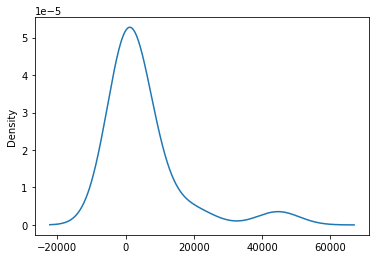

In [10]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [11]:
# Check road type factor
road_surface = ml_df["road_surface"].value_counts()
road_surface

A    87755
B     4525
C       27
D       20
Name: road_surface, dtype: int64

In [12]:
# Determine which values to replace if counts are less than ...?
# replace_road_surface = list(road_surface[road_surface < 10000].index)

# Replace in dataframe
# for app in replace_road_surface:
#    ml_df.road_surface = ml_df.road_surface.replace(app,"slippery")
    
# Check to make sure binning was successful
#ml_df.road_surface.value_counts()

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery (Muddy, Oily, etc.)

In [13]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    90472
D     1250
C      184
G      178
A      140
E       43
F       35
B       25
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [14]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    64014
C    22035
D     3359
B     2775
E      144
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [15]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
safety_equip_used = ml_df["safety_equip_used"].value_counts()
safety_equip_used

GM    47650
GL    34793
GP     2969
MQ     1698
LQ      721
PQ      667
HL      495
BL      393
CL      355
CM      308
BM      280
HM      278
LM      212
EL      189
EM      169
GN       90
HP       89
MP       70
BG       65
PW       58
FL       51
FM       46
BP       37
DL       36
AL       31
LP       31
MU       29
JM       27
GY       26
GQ       26
LU       23
LN       21
LY       19
MN       19
CP       19
AM       19
MS       17
BB       16
NY       16
MY       15
DM       15
LR       13
MR       13
MT       13
AP       12
NQ       12
PU       12
PP       10
PR        9
LT        9
BN        9
LS        9
EP        9
GH        8
FP        8
PT        8
JL        8
AB        6
MW        6
CN        6
PS        5
CG        5
KL        4
AG        4
GW        3
CY        2
PV        2
FQ        2
CU        2
DP        2
QY        2
BH        2
BQ        2
AW        2
AN        2
JP        1
EN        1
GK        1
BS        1
GU        1
MX        1
GT        1
DN        1
AQ  

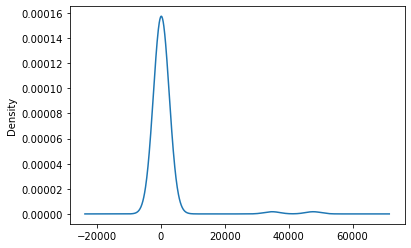

In [16]:
# Visualize the value counts of safety_equip_used
plot = safety_equip_used.plot.density()
fig = plot.get_figure()

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

# Machine Learning Modeling


In [17]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", 
                                            "party_soberiety", "move_pre_acc", 
                                             "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used", ])
ml_encoded.head()

,victim_role,victim_seating_postion,victim_ejected,severe_injury,weather_1_A,weather_1_B,weather_1_C,weather_1_D,weather_1_E,weather_1_F,...,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PR,safety_equip_used_PS,safety_equip_used_PT,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_QY
0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create our features
X = X = ml_encoded.drop("severe_injury", axis=1)
X.head()

,victim_role,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_D,weather_1_E,weather_1_F,weather_1_G,...,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PR,safety_equip_used_PS,safety_equip_used_PT,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_QY
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Create our target
y = ml_encoded["severe_injury"]

In [20]:
# Check the balance of our target values
y.value_counts()

0    90806
1     1521
Name: severe_injury, dtype: int64

In [21]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set X", X_train.shape)
print(f"Testing Set X", X_test.shape)
print(f"Training Set y", y_train.shape)
print(f"Testing Set y", y_test.shape)

Training Set X (69245, 152)
Testing Set X (23082, 152)
Training Set y (69245,)
Testing Set y (23082,)


# Random Oversampler

In [22]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 68090, 1: 68090})

In [23]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [24]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.7461910607264063
Testing Score: 0.7517546139849233


In [25]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7555958247093837

In [26]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,17074,5642
Actual Severe/Fatality,88,278


# SMOTE Imbalanced sampling 

In [27]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 68090, 1: 68090})

In [28]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [29]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.8527547115315185
Testing Score: 0.8536088727146695


In [30]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6621796870264044

In [31]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,19533,3183
Actual Severe/Fatality,196,170


In [32]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.46      0.92      0.63      0.42     22716
          1       0.05      0.46      0.86      0.09      0.63      0.38       366

avg / total       0.98      0.85      0.47      0.91      0.63      0.41     23082



# SMOTEENN Imbalanced sampling

In [33]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 47981, 1: 54884})

In [34]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [35]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.686511132472526

In [36]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,18342,4374
Actual Severe/Fatality,159,207


In [37]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.81      0.57      0.89      0.68      0.47     22716
          1       0.05      0.57      0.81      0.08      0.68      0.45       366

avg / total       0.98      0.80      0.57      0.88      0.68      0.47     23082



# Balanced Random Forest Classifier

In [38]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [39]:
# Create training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69245, 152)
(23082, 152)
(69245,)
(23082,)


In [40]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.7294967145642285
Testing Score: 0.7307858937700372


In [41]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7307858937700372

In [42]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "Predicted Severe/Fatality"])
cm_df


,Predicted Minor/No Injuries,Predicted Severe/Fatality
Actual Minor/No Injuries,16576,6140
Actual Severe/Fatality,74,292


In [43]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.73      0.80      0.84      0.76      0.58     22716
          1       0.05      0.80      0.73      0.09      0.76      0.59       366

avg / total       0.98      0.73      0.80      0.83      0.76      0.58     23082



In [44]:
# List the features sorted in descending order by feature importance
ranked_importances = brf_model.feature_importances_


In [45]:
# Create dataframe with X data for ranked importance columns
ml_encoded_X = ml_encoded.drop("severe_injury", axis=1)
ml_encoded_X

,victim_role,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_D,weather_1_E,weather_1_F,weather_1_G,...,safety_equip_used_NY,safety_equip_used_PP,safety_equip_used_PQ,safety_equip_used_PR,safety_equip_used_PS,safety_equip_used_PT,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_QY
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92322,2,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92323,2,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92324,2,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92325,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Rank feature importances and display results

ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded_X.columns), reverse=True)
ranked_importances

[(0.1384925364878785, 'safety_equip_used_GM'),
 (0.07700621488712178, 'victim_seating_postion'),
 (0.07004436661246953, 'party_soberiety_A'),
 (0.06461118619552972, 'safety_equip_used_GL'),
 (0.04454487973696163, 'lighting_A'),
 (0.03764430210640455, 'type_of_collision_E'),
 (0.030113743323547396, 'type_of_collision_C'),
 (0.029231223185636455, 'move_pre_acc_B'),
 (0.028535951045360348, 'lighting_C'),
 (0.025976232396223202, 'move_pre_acc_A'),
 (0.02534361868254312, 'victim_role'),
 (0.025309570015172797, 'type_of_collision_A'),
 (0.02476075522963328, 'party_soberiety_B'),
 (0.023543636831124988, 'safety_equip_used_HL'),
 (0.0212244971170349, 'party_soberiety_G'),
 (0.021023137522783522, 'type_of_collision_D'),
 (0.01933565310980457, 'move_pre_acc_E'),
 (0.01732910102546047, 'type_of_collision_B'),
 (0.016469894326676206, 'victim_ejected'),
 (0.016080529582783963, 'lighting_D'),
 (0.013622560673618143, 'weather_1_B'),
 (0.01322997253724987, 'weather_1_A'),
 (0.0112938606473114, 'move_p

In [47]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.138493,safety_equip_used_GM
1,0.077006,victim_seating_postion
2,0.070044,party_soberiety_A
3,0.064611,safety_equip_used_GL
4,0.044545,lighting_A
...,...,...
147,0.000000,safety_equip_used_BH
148,0.000000,safety_equip_used_BC
149,0.000000,safety_equip_used_AW
150,0.000000,safety_equip_used_AV


<Figure size 1440x720 with 0 Axes>

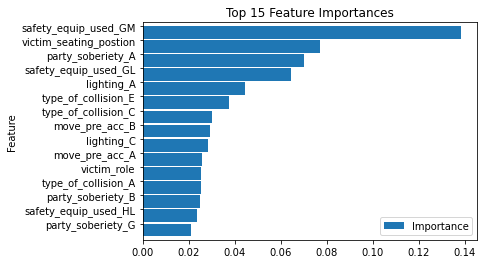

In [48]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [49]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


# Easy Ensemble Classifier

In [50]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.72873131634053
Testing Score: 0.7325621696560091


In [51]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7325621696560091

In [52]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [53]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "Predicted Severe/Fatality"])
cm_df


,Predicted Minor/No Injuries,Predicted Severe/Fatality
Actual Minor/No Injuries,16628,6088
Actual Severe/Fatality,85,281


In [54]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.73      0.77      0.84      0.75      0.56     22716
          1       0.04      0.77      0.73      0.08      0.75      0.56       366

avg / total       0.98      0.73      0.77      0.83      0.75      0.56     23082

